# MNIST

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

In [3]:
# Flatten input data
X = torch.flatten(train_data.data,start_dim=1).float()/255
X_test = torch.flatten(test_data.data,start_dim=1).float()/255
y = train_data.targets
y_test = test_data.targets

# 64개씩 데이터를 순서를 섞어서 return하는 dataloader 생성 
ds_train = torch.utils.data.TensorDataset(X, y)
ds_test = torch.utils.data.TensorDataset(X_test, y_test)

loader_train = torch.utils.data.DataLoader(ds_train, 
                                           batch_size=100, 
                                           shuffle=True,
                                           drop_last=True)
loader_test = torch.utils.data.DataLoader(ds_test,
                                          batch_size=100,
                                          shuffle=False)

In [4]:
input_size = 784
hidden_sizes = [64, 32]
output_size = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_sizes[0], bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[0], hidden_sizes[1], bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[1], output_size, bias=True) #cross entropy에 softmax 함수 포함
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)


In [5]:
learningrate =0.005
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningrate)

def train():
    model.train() #학습 모드
  
    for data, targets in loader_train:
        optimizer.zero_grad()
        y_pred = model(data)
        loss = criterion(y_pred, targets)
        loss.backward()
        optimizer.step()

In [6]:
def test():
    model.eval() #평가 모드
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader_test:
            output = model(data)
            test_loss += criterion(output,target).item() 
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loader_test.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format
          (test_loss, correct, len(loader_test.dataset),
        100. * correct / len(loader_test.dataset)))

In [7]:
test()
for i in range(10): 
    train()
    test()


Test set: Average loss: 0.0231, Accuracy: 892/10000 (9%)


Test set: Average loss: 0.0016, Accuracy: 9529/10000 (95%)


Test set: Average loss: 0.0013, Accuracy: 9608/10000 (96%)


Test set: Average loss: 0.0011, Accuracy: 9679/10000 (97%)


Test set: Average loss: 0.0010, Accuracy: 9699/10000 (97%)


Test set: Average loss: 0.0010, Accuracy: 9724/10000 (97%)


Test set: Average loss: 0.0011, Accuracy: 9716/10000 (97%)


Test set: Average loss: 0.0011, Accuracy: 9684/10000 (97%)


Test set: Average loss: 0.0013, Accuracy: 9675/10000 (97%)


Test set: Average loss: 0.0011, Accuracy: 9722/10000 (97%)


Test set: Average loss: 0.0015, Accuracy: 9650/10000 (96%)



 ### 위는 학습 전과 학습 동안, 학습 후의 train data의 오차와 정확도이다. 약 5번째 부터 오차가 상승하는 것으로 보아 오버피팅의 우려가 보이므로 최적의 정확도를 위해서는 그전에 학습을 끝내거나, drop out을 사용한다.

5487
예측한 값: tensor(2) 타겟: tensor(2)


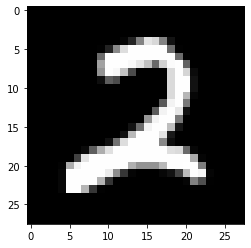

In [8]:
X_test = torch.flatten(test_data.data,start_dim=1).float()/255
output = model(X_test)
predict = output.max(1)[1]
# 데이터 그림과 예측값 그리고 타겟
index = int(input())
test.data = X_test.reshape(10000,28,28)
print('예측한 값:',predict[index],'타겟:',y_test[index])
plt.imshow(test_data.data[index], cmap='gray')